In [1]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
website_url = 'https://stats-api.mlssoccer.com/v1/clubs/seasons?&season_opta_id=2021&competition_opta_id=98&page_size=30&include=regular_season_statistics&include=club'
response = requests.get(website_url)

response.status_code

200

In [3]:
print(type(response))
response.content

<class 'requests.models.Response'>


b'[{"id":281059,"season_id":706,"club_id":5,"club_name":"New York Red Bulls","club_abbreviation":"RBNY","venue_id":59,"country_id":13,"region_id":4,"club":{"created":1602184675000,"updated":1602184675000,"id":5,"opta_id":399,"name":"New York Red Bulls","abbreviation":"RBNY","year_founded":1995},"regular_season_statistics":{"accurate_back_zone_pass":3852,"accurate_corners_intobox":53,"accurate_cross":188,"accurate_cross_nocorner":120,"accurate_fwd_zone_pass":5172,"accurate_goal_kicks":225,"accurate_launches":166,"accurate_layoffs":82,"accurate_long_balls":810,"accurate_pass":8836,"accurate_throws":646,"aerial_lost":695,"aerial_won":706,"att_freekick_goal":1,"att_hd_goal":7,"att_ibox_goal":33,"att_lf_goal":11,"att_obox_goal":6,"att_pen_goal":3,"att_rf_goal":21,"att_setpiece":12,"attempted_tackle_foul":256,"attempts_conceded_ibox":91,"attempts_conceded_obox":30,"ball_recovery":2530,"blocked_scoring_att":119,"clean_sheet":13,"clearance_off_line":1,"corner_taken":177,"drops":3,"failed_back_

In [4]:
soup = BeautifulSoup(response.content, 'lxml')
print(soup.title)

None


In [5]:
print(soup)

<html><body><p>[{"id":281059,"season_id":706,"club_id":5,"club_name":"New York Red Bulls","club_abbreviation":"RBNY","venue_id":59,"country_id":13,"region_id":4,"club":{"created":1602184675000,"updated":1602184675000,"id":5,"opta_id":399,"name":"New York Red Bulls","abbreviation":"RBNY","year_founded":1995},"regular_season_statistics":{"accurate_back_zone_pass":3852,"accurate_corners_intobox":53,"accurate_cross":188,"accurate_cross_nocorner":120,"accurate_fwd_zone_pass":5172,"accurate_goal_kicks":225,"accurate_launches":166,"accurate_layoffs":82,"accurate_long_balls":810,"accurate_pass":8836,"accurate_throws":646,"aerial_lost":695,"aerial_won":706,"att_freekick_goal":1,"att_hd_goal":7,"att_ibox_goal":33,"att_lf_goal":11,"att_obox_goal":6,"att_pen_goal":3,"att_rf_goal":21,"att_setpiece":12,"attempted_tackle_foul":256,"attempts_conceded_ibox":91,"attempts_conceded_obox":30,"ball_recovery":2530,"blocked_scoring_att":119,"clean_sheet":13,"clearance_off_line":1,"corner_taken":177,"drops":3,

In [6]:
df = pd.read_json(website_url)
df

,id,season_id,club_id,club_name,club_abbreviation,venue_id,country_id,region_id,club,regular_season_statistics
0,281059,706,5,New York Red Bulls,RBNY,59,13.0,4.0,"{'created': 1602184675000, 'updated': 16021846...","{'accurate_back_zone_pass': 3852, 'accurate_co..."
1,281060,706,6,Sporting Kansas City,SKC,63,13.0,4.0,"{'created': 1602184675000, 'updated': 16021846...","{'accurate_back_zone_pass': 7955, 'accurate_co..."
2,281061,706,7,Colorado Rapids,COL,39,13.0,4.0,"{'created': 1602184675000, 'updated': 16021846...","{'accurate_back_zone_pass': 6380, 'accurate_co..."
3,281062,706,8,Columbus Crew,CLB,147078,13.0,4.0,"{'created': 1602184675000, 'updated': 16353885...","{'accurate_back_zone_pass': 6763, 'accurate_co..."
4,281063,706,9,New England Revolution,NE,23,13.0,4.0,"{'created': 1602184675000, 'updated': 16021846...","{'accurate_back_zone_pass': 5679, 'accurate_co..."
5,281064,706,10,San Jose Earthquakes,SJ,75,13.0,4.0,"{'created': 1602184675000, 'updated': 16021846...","{'accurate_back_zone_pass': 6819, 'accurate_co..."
6,281065,706,11,Chicago Fire FC,CHI,24,13.0,4.0,"{'created': 1602184675000, 'updated': 16353749...","{'accurate_back_zone_pass': 5766, 'accurate_co..."
7,281066,706,12,LA Galaxy,LA,38,13.0,4.0,"{'created': 1602184675000, 'updated': 16021846...","{'accurate_back_zone_pass': 7592, 'accurate_co..."
8,281067,706,13,D.C. United,DC,82,13.0,4.0,"{'created': 1602184675000, 'updated': 16021846...","{'accurate_back_zone_pass': 4640, 'accurate_co..."
9,281068,706,14,Portland Timbers,POR,62,13.0,4.0,"{'created': 1602184675000, 'updated': 16021846...","{'accurate_back_zone_pass': 5518, 'accurate_co..."


In [7]:
df = df.drop(df.index[[27]])

#Drop columns not needed

In [8]:
df = df.drop(axis=1, columns=['club', 'venue_id', 'country_id', 'region_id'])
df

,id,season_id,club_id,club_name,club_abbreviation,regular_season_statistics
0,281059,706,5,New York Red Bulls,RBNY,"{'accurate_back_zone_pass': 3852, 'accurate_co..."
1,281060,706,6,Sporting Kansas City,SKC,"{'accurate_back_zone_pass': 7955, 'accurate_co..."
2,281061,706,7,Colorado Rapids,COL,"{'accurate_back_zone_pass': 6380, 'accurate_co..."
3,281062,706,8,Columbus Crew,CLB,"{'accurate_back_zone_pass': 6763, 'accurate_co..."
4,281063,706,9,New England Revolution,NE,"{'accurate_back_zone_pass': 5679, 'accurate_co..."
5,281064,706,10,San Jose Earthquakes,SJ,"{'accurate_back_zone_pass': 6819, 'accurate_co..."
6,281065,706,11,Chicago Fire FC,CHI,"{'accurate_back_zone_pass': 5766, 'accurate_co..."
7,281066,706,12,LA Galaxy,LA,"{'accurate_back_zone_pass': 7592, 'accurate_co..."
8,281067,706,13,D.C. United,DC,"{'accurate_back_zone_pass': 4640, 'accurate_co..."
9,281068,706,14,Portland Timbers,POR,"{'accurate_back_zone_pass': 5518, 'accurate_co..."


In [9]:
df['regular_season_statistics']

0     {'accurate_back_zone_pass': 3852, 'accurate_co...
1     {'accurate_back_zone_pass': 7955, 'accurate_co...
2     {'accurate_back_zone_pass': 6380, 'accurate_co...
3     {'accurate_back_zone_pass': 6763, 'accurate_co...
4     {'accurate_back_zone_pass': 5679, 'accurate_co...
5     {'accurate_back_zone_pass': 6819, 'accurate_co...
6     {'accurate_back_zone_pass': 5766, 'accurate_co...
7     {'accurate_back_zone_pass': 7592, 'accurate_co...
8     {'accurate_back_zone_pass': 4640, 'accurate_co...
9     {'accurate_back_zone_pass': 5518, 'accurate_co...
10    {'accurate_back_zone_pass': 7294, 'accurate_co...
11    {'accurate_back_zone_pass': 6024, 'accurate_co...
12    {'accurate_back_zone_pass': 5278, 'accurate_co...
13    {'accurate_back_zone_pass': 6137, 'accurate_co...
14    {'accurate_back_zone_pass': 7842, 'accurate_co...
15    {'accurate_back_zone_pass': 6052, 'accurate_co...
16    {'accurate_back_zone_pass': 6616, 'accurate_co...
17    {'accurate_back_zone_pass': 4516, 'accurat

#Filter regular_season_statistics

In [10]:
games_list = []
for entry in df['regular_season_statistics']:
    games_list.append(entry['games_played'])
print(games_list)

games = pd.DataFrame (games_list, columns = ['Games'])
print (games)

[34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34]
    Games
0      34
1      34
2      34
3      34
4      34
5      34
6      34
7      34
8      34
9      34
10     34
11     34
12     34
13     34
14     34
15     34
16     34
17     34
18     34
19     34
20     34
21     34
22     34
23     34
24     34
25     34
26     34


In [11]:
goals_list = []
for entry in df['regular_season_statistics']:
    goals_list.append(entry['goals'])
print(goals_list)

goals = pd.DataFrame (goals_list, columns = ['Goals'])
print (goals)

[39, 58, 51, 46, 65, 46, 36, 50, 56, 56, 46, 45, 36, 55, 47, 39, 53, 48, 50, 42, 56, 45, 37, 53, 36, 55, 35]
    Goals
0      39
1      58
2      51
3      46
4      65
5      46
6      36
7      50
8      56
9      56
10     46
11     45
12     36
13     55
14     47
15     39
16     53
17     48
18     50
19     42
20     56
21     45
22     37
23     53
24     36
25     55
26     35


In [12]:
goals_against_list = []
for entry in df['regular_season_statistics']:
    goals_against_list.append(entry['goals_conceded'])
print(goals_against_list)

goals_against = pd.DataFrame (goals_against_list, columns = ['Goals against'])
print (goals_against)

[33, 40, 35, 45, 41, 54, 54, 54, 54, 52, 44, 45, 54, 54, 56, 66, 33, 35, 48, 44, 36, 37, 74, 51, 53, 33, 56]
    Goals against
0              33
1              40
2              35
3              45
4              41
5              54
6              54
7              54
8              54
9              52
10             44
11             45
12             54
13             54
14             56
15             66
16             33
17             35
18             48
19             44
20             36
21             37
22             74
23             51
24             53
25             33
26             56


In [13]:
percentage_list = []
for entry in df['regular_season_statistics']:
    percentage_list.append(entry['possession_percentage'])
print(percentage_list)

percentage = pd.DataFrame (percentage_list, columns = ['Ball possession'])
print (percentage)

[48, 55, 48, 52, 51, 52, 50, 54, 46, 45, 52, 46, 45, 51, 51, 50, 49, 48, 51, 50, 53, 57, 49, 50, 47, 46, 54]
    Ball possession
0                48
1                55
2                48
3                52
4                51
5                52
6                50
7                54
8                46
9                45
10               52
11               46
12               45
13               51
14               51
15               50
16               49
17               48
18               51
19               50
20               53
21               57
22               49
23               50
24               47
25               46
26               54


In [14]:
total_wins_list = []
for entry in df['regular_season_statistics']:
    total_wins_list.append(entry['total_wins'])
print(total_wins_list)

wins = pd.DataFrame (total_wins_list, columns = ['Total wins'])
print (wins)

[13, 17, 17, 13, 22, 10, 9, 13, 14, 17, 12, 12, 6, 14, 7, 6, 17, 14, 13, 13, 14, 13, 4, 12, 12, 12, 9]
    Total wins
0           13
1           17
2           17
3           13
4           22
5           10
6            9
7           13
8           14
9           17
10          12
11          12
12           6
13          14
14           7
15           6
16          17
17          14
18          13
19          13
20          14
21          13
22           4
23          12
24          12
25          12
26           9


In [15]:
total_losses_list = []
for entry in df['regular_season_statistics']:
    total_losses_list.append(entry['total_losses'])
print(total_losses_list)

losses = pd.DataFrame (total_losses_list, columns = ['Total losses'])
print (losses)

[12, 10, 7, 13, 5, 13, 18, 12, 15, 13, 12, 9, 16, 14, 15, 18, 8, 8, 9, 11, 11, 9, 22, 13, 17, 4, 21]
    Total losses
0             12
1             10
2              7
3             13
4              5
5             13
6             18
7             12
8             15
9             13
10            12
11             9
12            16
13            14
14            15
15            18
16             8
17             8
18             9
19            11
20            11
21             9
22            22
23            13
24            17
25             4
26            21


In [16]:
total_draws_list = []
for entry in df['regular_season_statistics']:
    total_draws_list.append(entry['total_draws'])
print(total_draws_list)

draws = pd.DataFrame (total_draws_list, columns = ['Total draws'])
print (draws)

[9, 7, 10, 8, 7, 11, 7, 9, 5, 4, 10, 13, 12, 6, 12, 10, 9, 12, 12, 10, 9, 12, 8, 9, 5, 18, 4]
    Total draws
0             9
1             7
2            10
3             8
4             7
5            11
6             7
7             9
8             5
9             4
10           10
11           13
12           12
13            6
14           12
15           10
16            9
17           12
18           12
19           10
20            9
21           12
22            8
23            9
24            5
25           18
26            4


In [17]:
total_pass_list = []
for entry in df['regular_season_statistics']:
    total_pass_list.append(entry['total_pass'])
print(total_pass_list)

passes = pd.DataFrame (total_pass_list, columns = ['Total passes'])
print (passes)

[12455, 17698, 14572, 15181, 14894, 14469, 14279, 17263, 12655, 13786, 16319, 13552, 12915, 14437, 15557, 15708, 14909, 13583, 15435, 15059, 15743, 16850, 14677, 14502, 14047, 13995, 16082]
    Total passes
0          12455
1          17698
2          14572
3          15181
4          14894
5          14469
6          14279
7          17263
8          12655
9          13786
10         16319
11         13552
12         12915
13         14437
14         15557
15         15708
16         14909
17         13583
18         15435
19         15059
20         15743
21         16850
22         14677
23         14502
24         14047
25         13995
26         16082


In [18]:
fk_foul_lost_list = []
for entry in df['regular_season_statistics']:
    fk_foul_lost_list.append(entry['fk_foul_lost'])
print(fk_foul_lost_list)

fk_foul_lost = pd.DataFrame (fk_foul_lost_list, columns = ['Fouls committed'])
print (fk_foul_lost)

[509, 347, 402, 357, 374, 427, 445, 384, 513, 414, 415, 404, 449, 366, 457, 336, 379, 431, 398, 427, 506, 388, 431, 446, 441, 437, 351]
    Fouls committed
0               509
1               347
2               402
3               357
4               374
5               427
6               445
7               384
8               513
9               414
10              415
11              404
12              449
13              366
14              457
15              336
16              379
17              431
18              398
19              427
20              506
21              388
22              431
23              446
24              441
25              437
26              351


In [19]:
fk_foul_won_list = []
for entry in df['regular_season_statistics']:
    fk_foul_won_list.append(entry['fk_foul_won'])
print(fk_foul_won_list)

fk_foul_won = pd.DataFrame (fk_foul_won_list, columns = ['Fouls suffered'])
print (fk_foul_won)

[373, 401, 310, 430, 405, 473, 420, 360, 406, 384, 381, 400, 371, 339, 357, 410, 448, 355, 419, 381, 403, 507, 415, 387, 421, 381, 348]
    Fouls suffered
0              373
1              401
2              310
3              430
4              405
5              473
6              420
7              360
8              406
9              384
10             381
11             400
12             371
13             339
14             357
15             410
16             448
17             355
18             419
19             381
20             403
21             507
22             415
23             387
24             421
25             381
26             348


#Drop regular_seawson_statistics columns and merge dfs

In [20]:
df = df.drop(axis=1, columns=['regular_season_statistics'])
df

,id,season_id,club_id,club_name,club_abbreviation
0,281059,706,5,New York Red Bulls,RBNY
1,281060,706,6,Sporting Kansas City,SKC
2,281061,706,7,Colorado Rapids,COL
3,281062,706,8,Columbus Crew,CLB
4,281063,706,9,New England Revolution,NE
5,281064,706,10,San Jose Earthquakes,SJ
6,281065,706,11,Chicago Fire FC,CHI
7,281066,706,12,LA Galaxy,LA
8,281067,706,13,D.C. United,DC
9,281068,706,14,Portland Timbers,POR


In [21]:
df1 = pd.concat([df, games], axis=1)
df2 = pd.concat([df1, goals], axis=1)
df3 = pd.concat([df2, goals_against], axis=1)
df4 = pd.concat([df3, percentage], axis=1)
df5 = pd.concat([df4, wins], axis=1)
df6 = pd.concat([df5, losses], axis=1)
df7 = pd.concat([df6, draws], axis=1)
df8 = pd.concat([df7, passes], axis=1)
df9 = pd.concat([df8, fk_foul_lost], axis=1)
season_2021 = pd.concat([df9, fk_foul_won], axis=1)
season_2021

,id,season_id,club_id,club_name,club_abbreviation,Games,Goals,Goals against,Ball possession,Total wins,Total losses,Total draws,Total passes,Fouls committed,Fouls suffered
0,281059,706,5,New York Red Bulls,RBNY,34,39,33,48,13,12,9,12455,509,373
1,281060,706,6,Sporting Kansas City,SKC,34,58,40,55,17,10,7,17698,347,401
2,281061,706,7,Colorado Rapids,COL,34,51,35,48,17,7,10,14572,402,310
3,281062,706,8,Columbus Crew,CLB,34,46,45,52,13,13,8,15181,357,430
4,281063,706,9,New England Revolution,NE,34,65,41,51,22,5,7,14894,374,405
5,281064,706,10,San Jose Earthquakes,SJ,34,46,54,52,10,13,11,14469,427,473
6,281065,706,11,Chicago Fire FC,CHI,34,36,54,50,9,18,7,14279,445,420
7,281066,706,12,LA Galaxy,LA,34,50,54,54,13,12,9,17263,384,360
8,281067,706,13,D.C. United,DC,34,56,54,46,14,15,5,12655,513,406
9,281068,706,14,Portland Timbers,POR,34,56,52,45,17,13,4,13786,414,384


In [22]:
season_2021.to_csv('season_2021')

#Correlations

C:\Users\andyr\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andyr\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andyr\anaconda3\lib\site-packages\seaborn\distributions.py:1078: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andyr\anaconda3\lib\site-packages\seaborn\distributions.py:1078: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andyr\anaconda3\lib\site-packages\seaborn\distributions.py:1078: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andyr\anaconda3\lib\site-packages\seaborn\distributions.py:1078: UserWarning: Dataset has 0 variance; skipping density estimate.
  wa

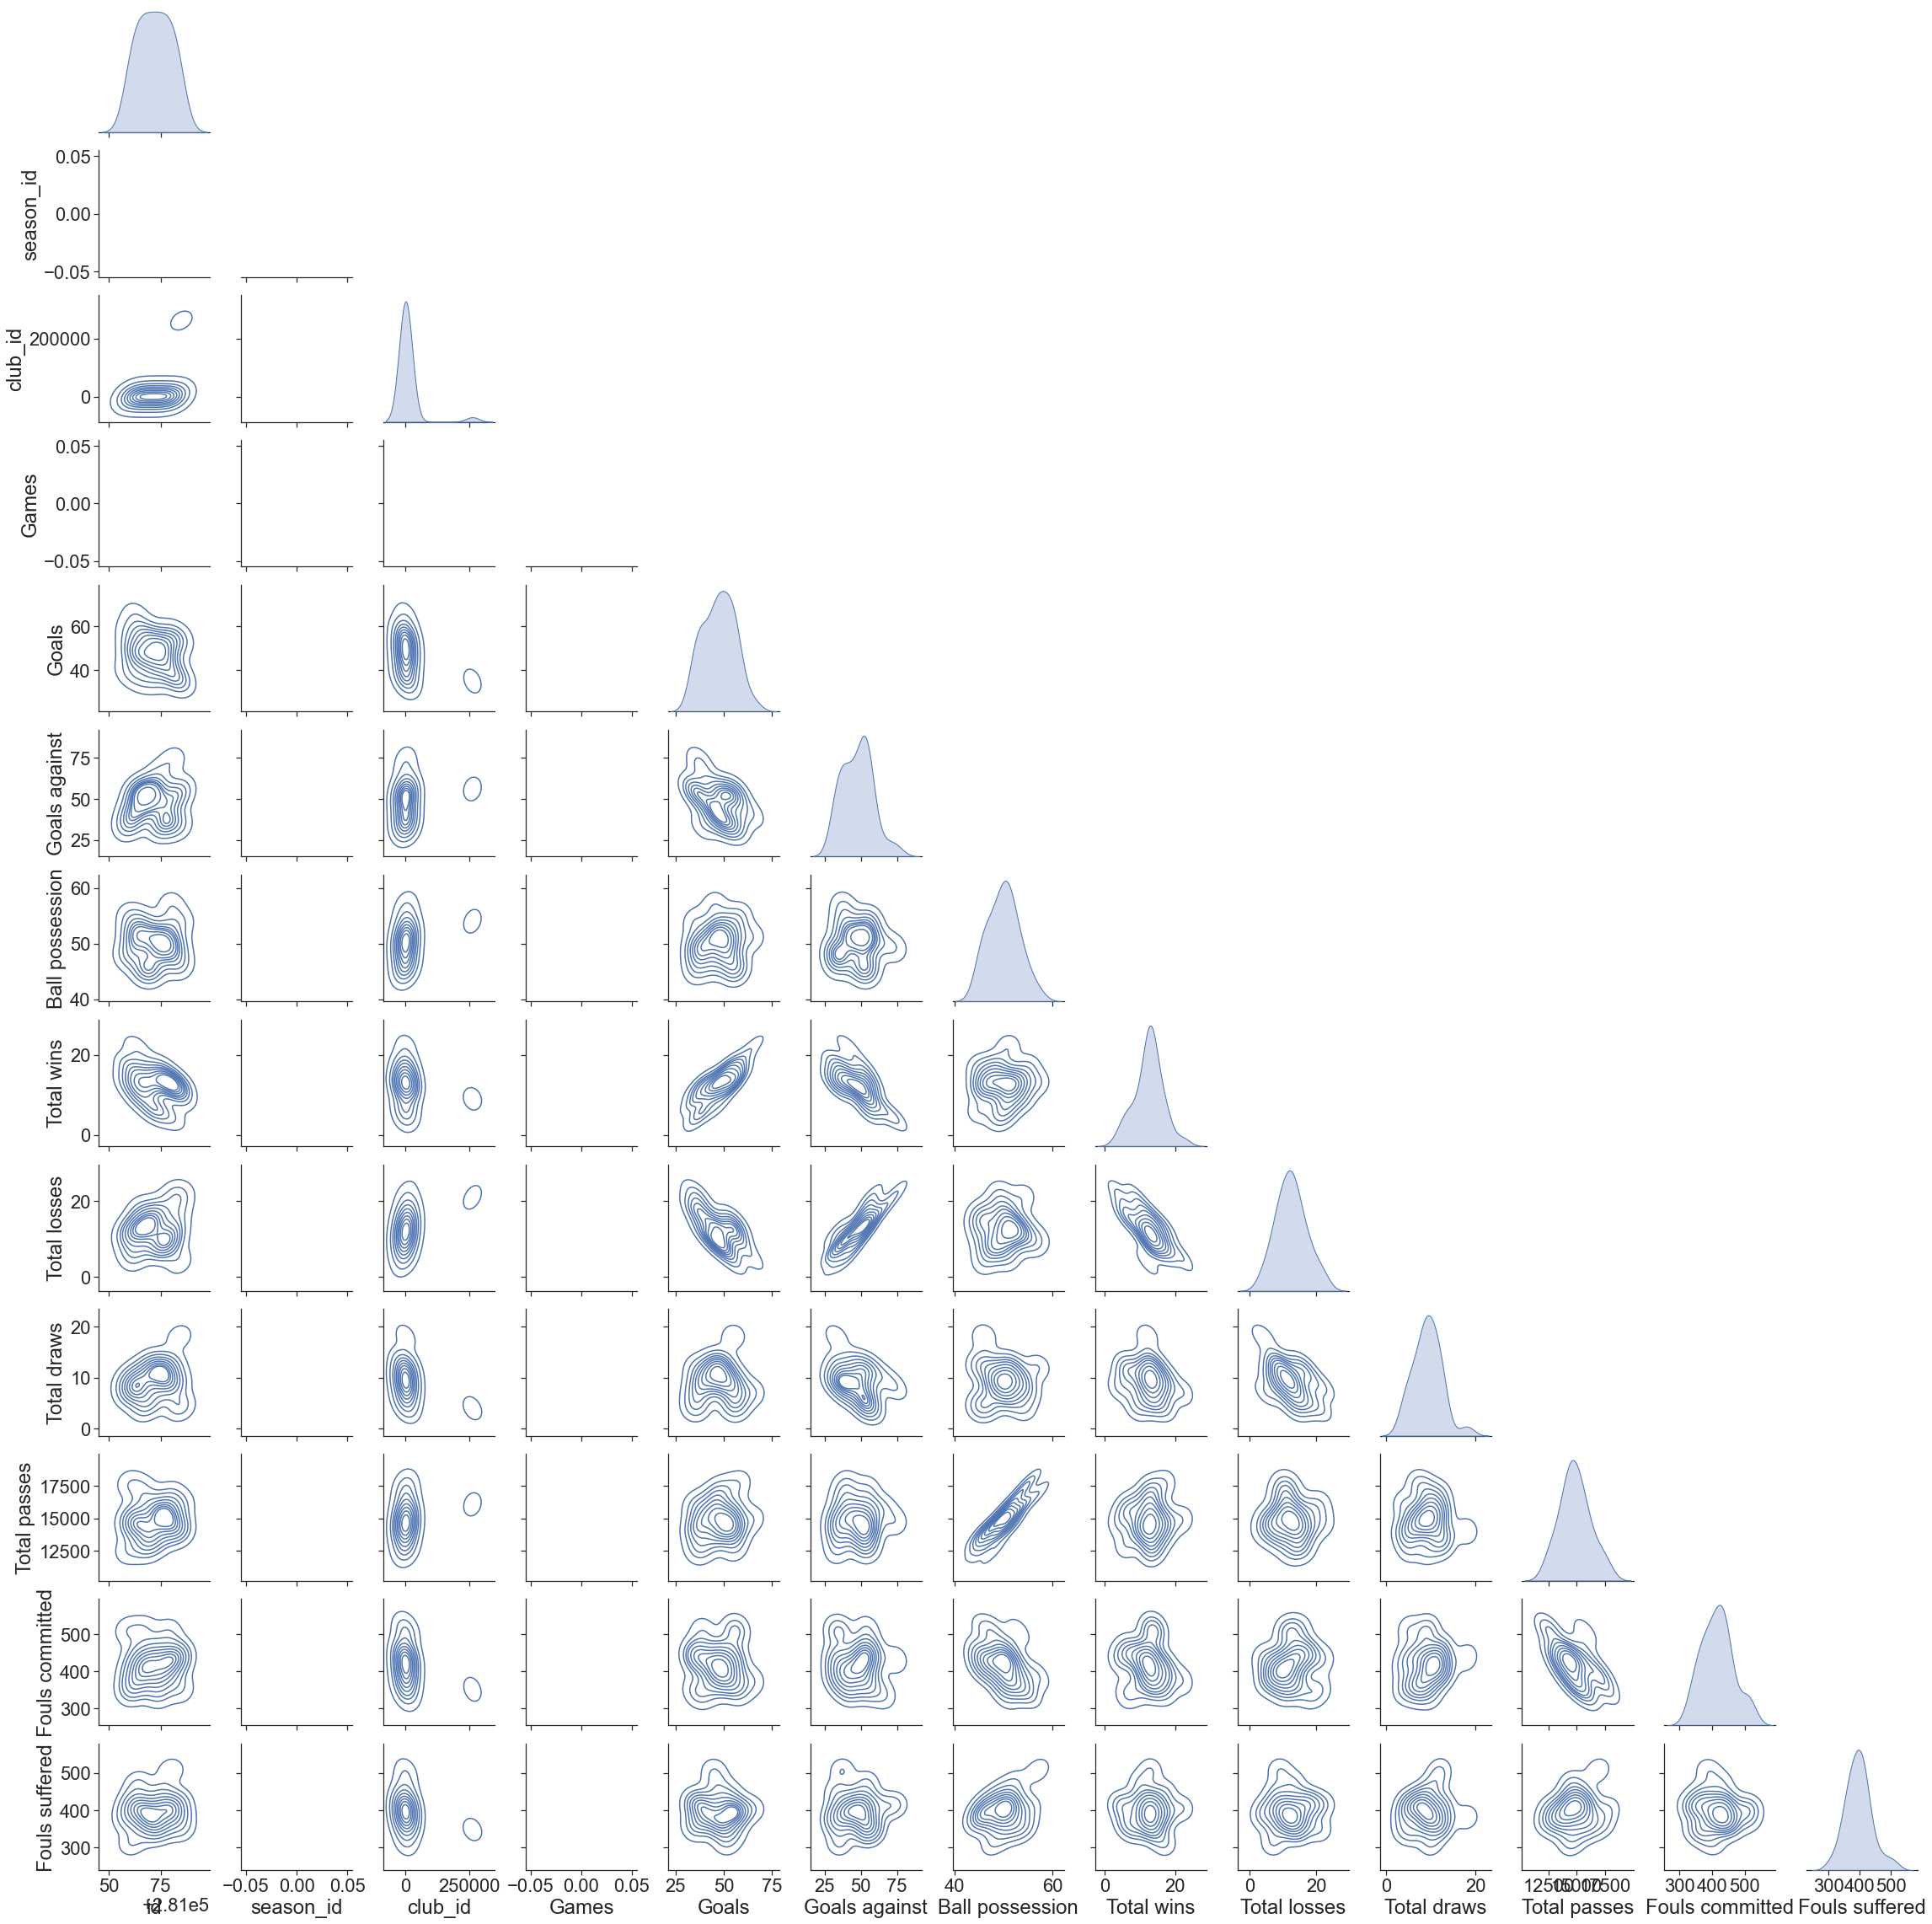

In [23]:
#set the seaborn theme, style, color palette
sns.set(style="ticks", color_codes=True, font_scale=2)

#make a correlation plot that looks at each variables relationship with every other variable
#and plots the distribution of each variable along the diagonal
sns.pairplot(season_2021, kind="kde", corner=True);

#correlation (total wins/goals)(total wins/goals against)(total losses/goals)(total losses/goals against)(total losses/total wins)(total passes/ball possession)(fouls committed/total passes)

0.7710492111880288


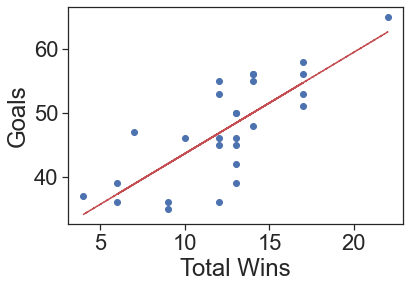

In [105]:
#Plot wins/goals
x = season_2021['Total wins']
y = season_2021['Goals']
plt.scatter('Total wins', 'Goals', data = season_2021)
plt.xlabel('Total Wins')
plt.ylabel('Goals')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

#Correlation wins/goals
print(season_2021['Total wins'].corr(season_2021['Goals']));

0.8384827781607904


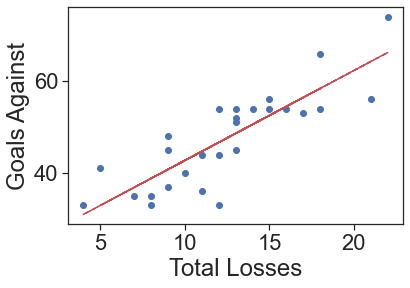

In [106]:
#Plot losses/goals against
x = season_2021['Total losses']
y = season_2021['Goals against']
plt.scatter('Total losses', 'Goals against', data = season_2021)
plt.xlabel('Total Losses')
plt.ylabel('Goals Against')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

#Correlation losses/goals against
print(season_2021['Total losses'].corr(season_2021['Goals against']));

-0.6742155699088939


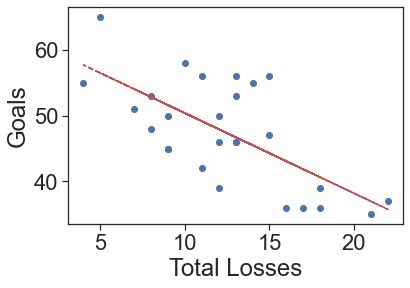

In [107]:
#Plot losses/goals
x = season_2021['Total losses']
y = season_2021['Goals']
plt.scatter('Total losses', 'Goals', data = season_2021)
plt.xlabel('Total Losses')
plt.ylabel('Goals')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

#Correlation losses/goals
print(season_2021['Total losses'].corr(season_2021['Goals']));

-0.7295818555909293


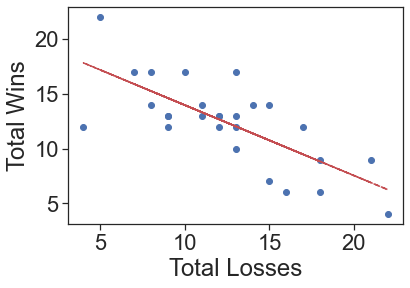

In [108]:
#Plot losses/wins
x = season_2021['Total losses']
y = season_2021['Total wins']
plt.scatter('Total losses', 'Total wins', data = season_2021)
plt.xlabel('Total Losses')
plt.ylabel('Total Wins')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

#Correlation losses/wins
print(season_2021['Total losses'].corr(season_2021['Total wins']));

0.8633867427426782


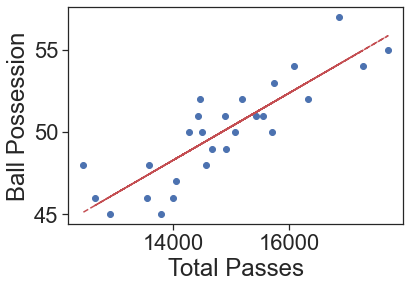

In [109]:
#Plot passes/possession
x = season_2021['Total passes']
y = season_2021['Ball possession']
plt.scatter('Total passes', 'Ball possession', data = season_2021)
plt.xlabel('Total Passes')
plt.ylabel('Ball Possession')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

#Correlation passes/possession
print(season_2021['Total passes'].corr(season_2021['Ball possession']));

0.07358156178966925


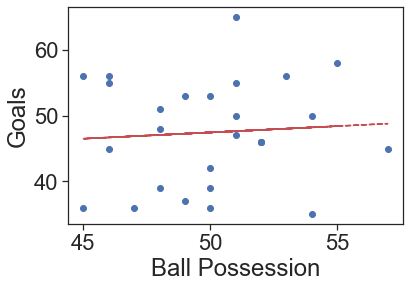

In [110]:
#Plot goals/possession
x = season_2021['Ball possession']
y = season_2021['Goals']
plt.scatter('Ball possession', 'Goals', data = season_2021)
plt.xlabel('Ball Possession')
plt.ylabel('Goals')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

#Correlation passes/possession
print(season_2021['Ball possession'].corr(season_2021['Goals']));

0.28715433543213476


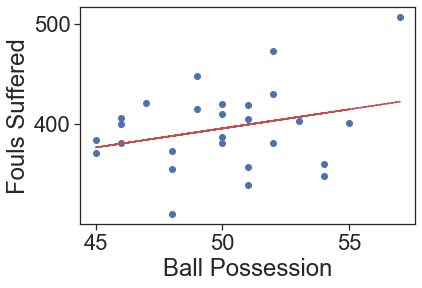

In [111]:
#Plot fouls suffered/possession
x = season_2021['Ball possession']
y = season_2021['Fouls suffered']
plt.scatter('Ball possession', 'Fouls suffered', data = season_2021)
plt.xlabel('Ball Possession')
plt.ylabel('Fouls Suffered')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

#Correlation fouls suffered/possession
print(season_2021['Ball possession'].corr(season_2021['Fouls suffered']));

-0.04502420233659581


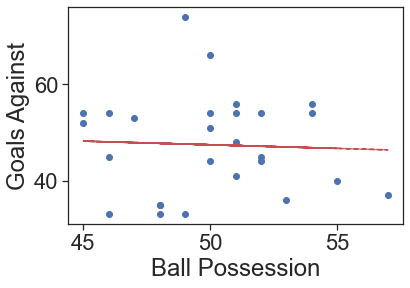

In [112]:
#Plot ga/possession
x = season_2021['Ball possession']
y = season_2021['Goals against']
plt.scatter('Ball possession', 'Goals against', data = season_2021)
plt.xlabel('Ball Possession')
plt.ylabel('Goals Against')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

#Correlation ga/possession
print(season_2021['Ball possession'].corr(season_2021['Goals against']));

-0.5806087602293337


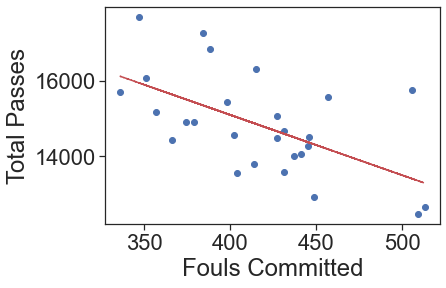

In [113]:
#Plot fouls committed/passes
x = season_2021['Fouls committed']
y = season_2021['Total passes']
plt.scatter('Fouls committed', 'Total passes', data = season_2021)
plt.xlabel('Fouls Committed')
plt.ylabel('Total Passes')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

#Correlation fouls committed/passes
print(season_2021['Fouls committed'].corr(season_2021['Total passes']));

0.13580947472280383


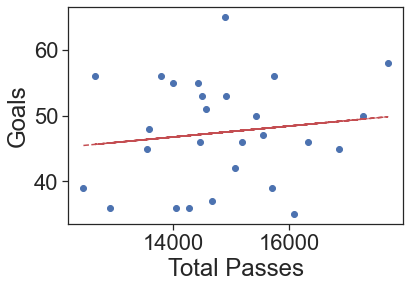

In [114]:
#Plot passes/g
x = season_2021['Total passes']
y = season_2021['Goals']
plt.scatter('Total passes', 'Goals', data = season_2021)
plt.xlabel('Total Passes')
plt.ylabel('Goals')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

#Correlation passes/g
print(season_2021['Total passes'].corr(season_2021['Goals']));

0.0190431713162299


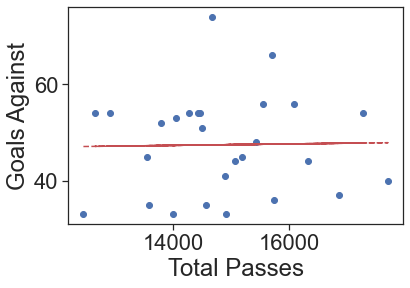

In [115]:
#Plot passes/ga
x = season_2021['Total passes']
y = season_2021['Goals against']
plt.scatter('Total passes', 'Goals against', data = season_2021)
plt.xlabel('Total Passes')
plt.ylabel('Goals Against')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

#Correlation passes/ga
print(season_2021['Total passes'].corr(season_2021['Goals against']));

0.15719910785807684


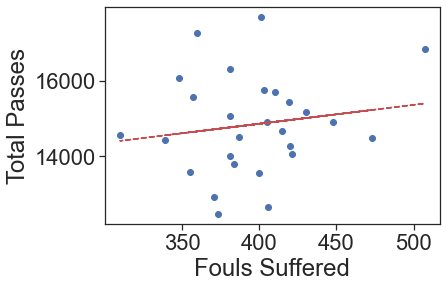

In [116]:
#Plot fouls suffered/passes
x = season_2021['Fouls suffered']
y = season_2021['Total passes']
plt.scatter('Fouls suffered', 'Total passes', data = season_2021)
plt.xlabel('Fouls Suffered')
plt.ylabel('Total Passes')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

#Correlation fouls suffered/passes
print(season_2021['Fouls suffered'].corr(season_2021['Total passes']));

# Player stats

#Get player data

In [36]:
website_url = 'https://stats-api.mlssoccer.com/v1/players/seasons?&season_opta_id=2021&competition_opta_id=98&page_size=30&order_by=-regular_season_player_season_stat_goals&include=regular_season_statistics&include=club&include=player&order_by=player_last_name'
response = requests.get(website_url)

response.status_code

200

In [37]:
print(type(response))
response.content

<class 'requests.models.Response'>


b'[{"join_date":1546300800000,"leave_date":null,"timestamp":null,"id":6857071,"player_id":5047,"club_season_id":281079,"jersey":11,"on_loan":false,"position_generic":"Forward","position_side":"Centre","position_specific":"Striker","preferred_foot":"Right","player":{"created":1635368060000,"updated":1635368060000,"birth_date":907372800000,"id":5047,"opta_id":247670,"full_name":"Valent\xc3\xadn Castellanos","first_name":"Valent\xc3\xadn","last_name":"Castellanos","known_name":null,"birth_city":"Mendoza","birth_state":null,"birth_country":"Argentina","preferred_foot":"Right","height":178,"weight":70},"regular_season_statistics":{"accurate_back_zone_pass":118,"accurate_cross":1,"accurate_cross_nocorner":1,"accurate_fwd_zone_pass":382,"accurate_launches":1,"accurate_layoffs":44,"accurate_long_balls":9,"accurate_pass":499,"accurate_throws":5,"aerial_lost":102,"aerial_won":94,"att_hd_goal":4,"att_ibox_goal":17,"att_lf_goal":1,"att_obox_goal":2,"att_pen_goal":4,"att_rf_goal":14,"attempted_tack

In [38]:
soup = BeautifulSoup(response.content, 'lxml')
print(soup.title)

None


#Create table

In [39]:
#create df
players = pd.read_json(website_url)
players

,join_date,leave_date,timestamp,id,player_id,club_season_id,jersey,on_loan,position_generic,position_side,position_specific,preferred_foot,player,regular_season_statistics,club
0,1546300800000,NaN,NaT,6857071,5047,281079,11,False,Forward,Centre,Striker,Right,"{'created': 1635368060000, 'updated': 16353680...","{'accurate_back_zone_pass': 118, 'accurate_cro...","{'created': 1602184675000, 'updated': 16021846..."
1,1565136000000,NaN,NaT,6856692,2686,281067,9,False,Forward,Centre,Striker,Left,"{'created': 1635848270000, 'updated': 16358482...","{'accurate_back_zone_pass': 91, 'accurate_cros...","{'created': 1602184675000, 'updated': 16021846..."
2,1579564800000,NaN,NaT,6856669,2442,281066,14,False,Forward,Centre,Striker,Right,"{'created': 1635368048000, 'updated': 16353680...","{'accurate_back_zone_pass': 96, 'accurate_cros...","{'created': 1602184675000, 'updated': 16021846..."
3,1530403200000,NaN,NaT,6856948,3250,281075,9,False,Forward,Unknown,Unknown,Right,"{'created': 1635848270000, 'updated': 16358482...","{'accurate_back_zone_pass': 140, 'accurate_cro...","{'created': 1602184675000, 'updated': 16021846..."
4,1577836800000,NaN,NaT,6856594,4645,281063,9,False,Forward,Centre,Striker,Both,"{'created': 1636843504000, 'updated': 16368435...","{'accurate_back_zone_pass': 98, 'accurate_cros...","{'created': 1602184675000, 'updated': 16021846..."
5,1517961600000,NaN,NaT,6856852,2872,281072,8,False,Midfielder,Centre,Central Midfielder,Right,"{'created': 1635848345000, 'updated': 16358483...","{'accurate_back_zone_pass': 432, 'accurate_cro...","{'created': 1602184675000, 'updated': 16021846..."
6,1577836800000,NaN,NaT,6857197,4160,281084,10,False,Midfielder,Centre,Attacking Midfielder,Both,"{'created': 1635368018000, 'updated': 16353680...","{'accurate_back_zone_pass': 343, 'accurate_cor...","{'created': 1602184675000, 'updated': 16021846..."
7,1452643200000,NaN,NaT,6856506,4805,281060,20,False,Forward,Unknown,Striker,None,"{'created': 1636843504000, 'updated': 16368435...","{'accurate_back_zone_pass': 140, 'accurate_cor...","{'created': 1602184675000, 'updated': 16021846..."
8,1562716800000,NaN,NaT,6856583,2671,281063,7,False,Forward,Centre,Striker,Right,"{'created': 1635368014000, 'updated': 16353680...","{'accurate_back_zone_pass': 92, 'accurate_corn...","{'created': 1602184675000, 'updated': 16021846..."
9,1517356800000,NaN,NaT,6856488,2429,281060,7,False,Forward,Left/Centre/Right,Winger,None,"{'created': 1635368034000, 'updated': 16353680...","{'accurate_back_zone_pass': 168, 'accurate_cor...","{'created': 1602184675000, 'updated': 16021846..."


In [40]:
#keep columns
players = players[['position_generic', 'player', 'regular_season_statistics', 'club']]
players

,position_generic,player,regular_season_statistics,club
0,Forward,"{'created': 1635368060000, 'updated': 16353680...","{'accurate_back_zone_pass': 118, 'accurate_cro...","{'created': 1602184675000, 'updated': 16021846..."
1,Forward,"{'created': 1635848270000, 'updated': 16358482...","{'accurate_back_zone_pass': 91, 'accurate_cros...","{'created': 1602184675000, 'updated': 16021846..."
2,Forward,"{'created': 1635368048000, 'updated': 16353680...","{'accurate_back_zone_pass': 96, 'accurate_cros...","{'created': 1602184675000, 'updated': 16021846..."
3,Forward,"{'created': 1635848270000, 'updated': 16358482...","{'accurate_back_zone_pass': 140, 'accurate_cro...","{'created': 1602184675000, 'updated': 16021846..."
4,Forward,"{'created': 1636843504000, 'updated': 16368435...","{'accurate_back_zone_pass': 98, 'accurate_cros...","{'created': 1602184675000, 'updated': 16021846..."
5,Midfielder,"{'created': 1635848345000, 'updated': 16358483...","{'accurate_back_zone_pass': 432, 'accurate_cro...","{'created': 1602184675000, 'updated': 16021846..."
6,Midfielder,"{'created': 1635368018000, 'updated': 16353680...","{'accurate_back_zone_pass': 343, 'accurate_cor...","{'created': 1602184675000, 'updated': 16021846..."
7,Forward,"{'created': 1636843504000, 'updated': 16368435...","{'accurate_back_zone_pass': 140, 'accurate_cor...","{'created': 1602184675000, 'updated': 16021846..."
8,Forward,"{'created': 1635368014000, 'updated': 16353680...","{'accurate_back_zone_pass': 92, 'accurate_corn...","{'created': 1602184675000, 'updated': 16021846..."
9,Forward,"{'created': 1635368034000, 'updated': 16353680...","{'accurate_back_zone_pass': 168, 'accurate_cor...","{'created': 1602184675000, 'updated': 16021846..."


In [41]:
#get name from club
club_list = []
for entry in players['club']:
    club_list.append(entry['name'])
print(club_list)

club1 = pd.DataFrame (club_list, columns = ['Club'])
print (club1)

['New York City FC', 'D.C. United', 'LA Galaxy', 'Seattle Sounders FC', 'New England Revolution', 'Real Salt Lake', 'Nashville SC', 'Sporting Kansas City', 'New England Revolution', 'Sporting Kansas City', 'Los Angeles Football Club', 'FC Dallas', 'Inter Miami CF', 'Nashville SC', 'San Jose Earthquakes', 'Atlanta United', 'Philadelphia Union', 'Vancouver Whitecaps FC', 'Columbus Crew', 'Portland Timbers', 'Houston Dynamo FC', 'Real Salt Lake', 'Orlando City SC', 'Portland Timbers', 'Vancouver Whitecaps FC', 'Orlando City SC', 'Minnesota United FC', 'New York City FC', 'Atlanta United', 'FC Dallas']
                         Club
0            New York City FC
1                 D.C. United
2                   LA Galaxy
3         Seattle Sounders FC
4      New England Revolution
5              Real Salt Lake
6                Nashville SC
7        Sporting Kansas City
8      New England Revolution
9        Sporting Kansas City
10  Los Angeles Football Club
11                  FC Dallas
12  

In [42]:
#concat new df to existing df
players1 = pd.concat([players, club1], axis=1)
players1

,position_generic,player,regular_season_statistics,club,Club
0,Forward,"{'created': 1635368060000, 'updated': 16353680...","{'accurate_back_zone_pass': 118, 'accurate_cro...","{'created': 1602184675000, 'updated': 16021846...",New York City FC
1,Forward,"{'created': 1635848270000, 'updated': 16358482...","{'accurate_back_zone_pass': 91, 'accurate_cros...","{'created': 1602184675000, 'updated': 16021846...",D.C. United
2,Forward,"{'created': 1635368048000, 'updated': 16353680...","{'accurate_back_zone_pass': 96, 'accurate_cros...","{'created': 1602184675000, 'updated': 16021846...",LA Galaxy
3,Forward,"{'created': 1635848270000, 'updated': 16358482...","{'accurate_back_zone_pass': 140, 'accurate_cro...","{'created': 1602184675000, 'updated': 16021846...",Seattle Sounders FC
4,Forward,"{'created': 1636843504000, 'updated': 16368435...","{'accurate_back_zone_pass': 98, 'accurate_cros...","{'created': 1602184675000, 'updated': 16021846...",New England Revolution
5,Midfielder,"{'created': 1635848345000, 'updated': 16358483...","{'accurate_back_zone_pass': 432, 'accurate_cro...","{'created': 1602184675000, 'updated': 16021846...",Real Salt Lake
6,Midfielder,"{'created': 1635368018000, 'updated': 16353680...","{'accurate_back_zone_pass': 343, 'accurate_cor...","{'created': 1602184675000, 'updated': 16021846...",Nashville SC
7,Forward,"{'created': 1636843504000, 'updated': 16368435...","{'accurate_back_zone_pass': 140, 'accurate_cor...","{'created': 1602184675000, 'updated': 16021846...",Sporting Kansas City
8,Forward,"{'created': 1635368014000, 'updated': 16353680...","{'accurate_back_zone_pass': 92, 'accurate_corn...","{'created': 1602184675000, 'updated': 16021846...",New England Revolution
9,Forward,"{'created': 1635368034000, 'updated': 16353680...","{'accurate_back_zone_pass': 168, 'accurate_cor...","{'created': 1602184675000, 'updated': 16021846...",Sporting Kansas City


In [43]:
#drop club column
players1 = players1.drop(axis=1, columns=['club'])
players1

,position_generic,player,regular_season_statistics,Club
0,Forward,"{'created': 1635368060000, 'updated': 16353680...","{'accurate_back_zone_pass': 118, 'accurate_cro...",New York City FC
1,Forward,"{'created': 1635848270000, 'updated': 16358482...","{'accurate_back_zone_pass': 91, 'accurate_cros...",D.C. United
2,Forward,"{'created': 1635368048000, 'updated': 16353680...","{'accurate_back_zone_pass': 96, 'accurate_cros...",LA Galaxy
3,Forward,"{'created': 1635848270000, 'updated': 16358482...","{'accurate_back_zone_pass': 140, 'accurate_cro...",Seattle Sounders FC
4,Forward,"{'created': 1636843504000, 'updated': 16368435...","{'accurate_back_zone_pass': 98, 'accurate_cros...",New England Revolution
5,Midfielder,"{'created': 1635848345000, 'updated': 16358483...","{'accurate_back_zone_pass': 432, 'accurate_cro...",Real Salt Lake
6,Midfielder,"{'created': 1635368018000, 'updated': 16353680...","{'accurate_back_zone_pass': 343, 'accurate_cor...",Nashville SC
7,Forward,"{'created': 1636843504000, 'updated': 16368435...","{'accurate_back_zone_pass': 140, 'accurate_cor...",Sporting Kansas City
8,Forward,"{'created': 1635368014000, 'updated': 16353680...","{'accurate_back_zone_pass': 92, 'accurate_corn...",New England Revolution
9,Forward,"{'created': 1635368034000, 'updated': 16353680...","{'accurate_back_zone_pass': 168, 'accurate_cor...",Sporting Kansas City


In [44]:
#get name from player
player_list = []
for entry in players['player']:
    player_list.append(entry['full_name'])
print(club_list)

player = pd.DataFrame (player_list, columns = ['Player'])
print (player)

['New York City FC', 'D.C. United', 'LA Galaxy', 'Seattle Sounders FC', 'New England Revolution', 'Real Salt Lake', 'Nashville SC', 'Sporting Kansas City', 'New England Revolution', 'Sporting Kansas City', 'Los Angeles Football Club', 'FC Dallas', 'Inter Miami CF', 'Nashville SC', 'San Jose Earthquakes', 'Atlanta United', 'Philadelphia Union', 'Vancouver Whitecaps FC', 'Columbus Crew', 'Portland Timbers', 'Houston Dynamo FC', 'Real Salt Lake', 'Orlando City SC', 'Portland Timbers', 'Vancouver Whitecaps FC', 'Orlando City SC', 'Minnesota United FC', 'New York City FC', 'Atlanta United', 'FC Dallas']
                  Player
0   Valentín Castellanos
1             Ola Kamara
2             Chicharito
3           Raúl Ruidíaz
4             Adam Buksa
5         Damir Kreilach
6           Hany Mukhtar
7          Dániel Sallói
8            Gustavo Bou
9         Johnny Russell
10       Cristian Arango
11          Ricardo Pepi
12       Gonzalo Higuaín
13           C.J. Sapong
14          Javier 

In [45]:
#get city from player
player_list = []
for entry in players['player']:
    player_list.append(entry['birth_city'])
print(club_list)

player1 = pd.DataFrame (player_list, columns = ['Born in'])
print (player1)

['New York City FC', 'D.C. United', 'LA Galaxy', 'Seattle Sounders FC', 'New England Revolution', 'Real Salt Lake', 'Nashville SC', 'Sporting Kansas City', 'New England Revolution', 'Sporting Kansas City', 'Los Angeles Football Club', 'FC Dallas', 'Inter Miami CF', 'Nashville SC', 'San Jose Earthquakes', 'Atlanta United', 'Philadelphia Union', 'Vancouver Whitecaps FC', 'Columbus Crew', 'Portland Timbers', 'Houston Dynamo FC', 'Real Salt Lake', 'Orlando City SC', 'Portland Timbers', 'Vancouver Whitecaps FC', 'Orlando City SC', 'Minnesota United FC', 'New York City FC', 'Atlanta United', 'FC Dallas']
          Born in
0         Mendoza
1            Oslo
2     Guadalajara
3            Lima
4          Krakow
5         Vukovar
6          Berlin
7          Siófok
8      Entre Ríos
9            None
10           None
11        El Paso
12          Brest
13       Manassas
14        Torreón
15       Valencia
16      Bielefeld
17     Pittsburgh
18        Córdoba
19       Santiago
20       New Yor

In [46]:
#get nationality from player
player_list = []
for entry in players['player']:
    player_list.append(entry['birth_country'])
print(club_list)

player3 = pd.DataFrame (player_list, columns = ['Nationality'])
print (player3)

['New York City FC', 'D.C. United', 'LA Galaxy', 'Seattle Sounders FC', 'New England Revolution', 'Real Salt Lake', 'Nashville SC', 'Sporting Kansas City', 'New England Revolution', 'Sporting Kansas City', 'Los Angeles Football Club', 'FC Dallas', 'Inter Miami CF', 'Nashville SC', 'San Jose Earthquakes', 'Atlanta United', 'Philadelphia Union', 'Vancouver Whitecaps FC', 'Columbus Crew', 'Portland Timbers', 'Houston Dynamo FC', 'Real Salt Lake', 'Orlando City SC', 'Portland Timbers', 'Vancouver Whitecaps FC', 'Orlando City SC', 'Minnesota United FC', 'New York City FC', 'Atlanta United', 'FC Dallas']
   Nationality
0    Argentina
1       Norway
2       Mexico
3         Peru
4       Poland
5      Croatia
6      Germany
7      Hungary
8    Argentina
9     Scotland
10    Colombia
11         USA
12   Argentina
13         USA
14      Mexico
15   Venezuela
16     Germany
17         USA
18     Armenia
19       Chile
20         USA
21    Slovakia
22    Portugal
23    Colombia
24    Colombia
25  

In [47]:
#concat new df to existing df
players2 = pd.concat([players1, player], axis=1)
players3 = pd.concat([players2, player1], axis=1)
players4 = pd.concat([players3, player3], axis=1)
players4

,position_generic,player,regular_season_statistics,Club,Player,Born in,Nationality
0,Forward,"{'created': 1635368060000, 'updated': 16353680...","{'accurate_back_zone_pass': 118, 'accurate_cro...",New York City FC,Valentín Castellanos,Mendoza,Argentina
1,Forward,"{'created': 1635848270000, 'updated': 16358482...","{'accurate_back_zone_pass': 91, 'accurate_cros...",D.C. United,Ola Kamara,Oslo,Norway
2,Forward,"{'created': 1635368048000, 'updated': 16353680...","{'accurate_back_zone_pass': 96, 'accurate_cros...",LA Galaxy,Chicharito,Guadalajara,Mexico
3,Forward,"{'created': 1635848270000, 'updated': 16358482...","{'accurate_back_zone_pass': 140, 'accurate_cro...",Seattle Sounders FC,Raúl Ruidíaz,Lima,Peru
4,Forward,"{'created': 1636843504000, 'updated': 16368435...","{'accurate_back_zone_pass': 98, 'accurate_cros...",New England Revolution,Adam Buksa,Krakow,Poland
5,Midfielder,"{'created': 1635848345000, 'updated': 16358483...","{'accurate_back_zone_pass': 432, 'accurate_cro...",Real Salt Lake,Damir Kreilach,Vukovar,Croatia
6,Midfielder,"{'created': 1635368018000, 'updated': 16353680...","{'accurate_back_zone_pass': 343, 'accurate_cor...",Nashville SC,Hany Mukhtar,Berlin,Germany
7,Forward,"{'created': 1636843504000, 'updated': 16368435...","{'accurate_back_zone_pass': 140, 'accurate_cor...",Sporting Kansas City,Dániel Sallói,Siófok,Hungary
8,Forward,"{'created': 1635368014000, 'updated': 16353680...","{'accurate_back_zone_pass': 92, 'accurate_corn...",New England Revolution,Gustavo Bou,Entre Ríos,Argentina
9,Forward,"{'created': 1635368034000, 'updated': 16353680...","{'accurate_back_zone_pass': 168, 'accurate_cor...",Sporting Kansas City,Johnny Russell,None,Scotland


In [48]:
#drop player column
players5 = players4.drop(axis=1, columns=['player'])
players5

,position_generic,regular_season_statistics,Club,Player,Born in,Nationality
0,Forward,"{'accurate_back_zone_pass': 118, 'accurate_cro...",New York City FC,Valentín Castellanos,Mendoza,Argentina
1,Forward,"{'accurate_back_zone_pass': 91, 'accurate_cros...",D.C. United,Ola Kamara,Oslo,Norway
2,Forward,"{'accurate_back_zone_pass': 96, 'accurate_cros...",LA Galaxy,Chicharito,Guadalajara,Mexico
3,Forward,"{'accurate_back_zone_pass': 140, 'accurate_cro...",Seattle Sounders FC,Raúl Ruidíaz,Lima,Peru
4,Forward,"{'accurate_back_zone_pass': 98, 'accurate_cros...",New England Revolution,Adam Buksa,Krakow,Poland
5,Midfielder,"{'accurate_back_zone_pass': 432, 'accurate_cro...",Real Salt Lake,Damir Kreilach,Vukovar,Croatia
6,Midfielder,"{'accurate_back_zone_pass': 343, 'accurate_cor...",Nashville SC,Hany Mukhtar,Berlin,Germany
7,Forward,"{'accurate_back_zone_pass': 140, 'accurate_cor...",Sporting Kansas City,Dániel Sallói,Siófok,Hungary
8,Forward,"{'accurate_back_zone_pass': 92, 'accurate_corn...",New England Revolution,Gustavo Bou,Entre Ríos,Argentina
9,Forward,"{'accurate_back_zone_pass': 168, 'accurate_cor...",Sporting Kansas City,Johnny Russell,None,Scotland


In [49]:
#add birth city to Johnny Russel, Christian Arango,Jesus Medina, and Marcelino Moreno

In [50]:
#get games played from regular_season_stats
season_list = []
for entry in players['regular_season_statistics']:
    season_list.append(entry['games_played'])
print(club_list)

stats = pd.DataFrame (season_list, columns = ['Games Played'])
print (stats)

['New York City FC', 'D.C. United', 'LA Galaxy', 'Seattle Sounders FC', 'New England Revolution', 'Real Salt Lake', 'Nashville SC', 'Sporting Kansas City', 'New England Revolution', 'Sporting Kansas City', 'Los Angeles Football Club', 'FC Dallas', 'Inter Miami CF', 'Nashville SC', 'San Jose Earthquakes', 'Atlanta United', 'Philadelphia Union', 'Vancouver Whitecaps FC', 'Columbus Crew', 'Portland Timbers', 'Houston Dynamo FC', 'Real Salt Lake', 'Orlando City SC', 'Portland Timbers', 'Vancouver Whitecaps FC', 'Orlando City SC', 'Minnesota United FC', 'New York City FC', 'Atlanta United', 'FC Dallas']
    Games Played
0             32
1             28
2             21
3             26
4             31
5             33
6             31
7             30
8             30
9             30
10            17
11            31
12            30
13            33
14            32
15            24
16            34
17            27
18            32
19            29
20            31
21            34
22 

In [51]:
#get goals from regular_season_stats
season_list = []
for entry in players['regular_season_statistics']:
    season_list.append(entry['goals'])
print(club_list)

stats1 = pd.DataFrame (season_list, columns = ['Goals'])
print (stats1)

['New York City FC', 'D.C. United', 'LA Galaxy', 'Seattle Sounders FC', 'New England Revolution', 'Real Salt Lake', 'Nashville SC', 'Sporting Kansas City', 'New England Revolution', 'Sporting Kansas City', 'Los Angeles Football Club', 'FC Dallas', 'Inter Miami CF', 'Nashville SC', 'San Jose Earthquakes', 'Atlanta United', 'Philadelphia Union', 'Vancouver Whitecaps FC', 'Columbus Crew', 'Portland Timbers', 'Houston Dynamo FC', 'Real Salt Lake', 'Orlando City SC', 'Portland Timbers', 'Vancouver Whitecaps FC', 'Orlando City SC', 'Minnesota United FC', 'New York City FC', 'Atlanta United', 'FC Dallas']
    Goals
0      19
1      19
2      17
3      17
4      16
5      16
6      16
7      16
8      15
9      15
10     14
11     13
12     12
13     12
14     12
15     12
16     12
17     12
18     12
19     11
20     11
21     11
22     10
23     10
24     10
25     10
26      9
27      9
28      9
29      9


In [52]:
#get minutes played from regular_season_stats
season_list = []
for entry in players['regular_season_statistics']:
    season_list.append(entry['mins_played'])
print(club_list)

stats2 = pd.DataFrame (season_list, columns = ['Minutes Played'])
print (stats2)

['New York City FC', 'D.C. United', 'LA Galaxy', 'Seattle Sounders FC', 'New England Revolution', 'Real Salt Lake', 'Nashville SC', 'Sporting Kansas City', 'New England Revolution', 'Sporting Kansas City', 'Los Angeles Football Club', 'FC Dallas', 'Inter Miami CF', 'Nashville SC', 'San Jose Earthquakes', 'Atlanta United', 'Philadelphia Union', 'Vancouver Whitecaps FC', 'Columbus Crew', 'Portland Timbers', 'Houston Dynamo FC', 'Real Salt Lake', 'Orlando City SC', 'Portland Timbers', 'Vancouver Whitecaps FC', 'Orlando City SC', 'Minnesota United FC', 'New York City FC', 'Atlanta United', 'FC Dallas']
    Minutes Played
0             2760
1             1819
2             1736
3             2146
4             2075
5             2875
6             2505
7             2453
8             2326
9             2221
10            1400
11            2097
12            2457
13            2225
14            2274
15            1641
16            2654
17            1928
18            2626
19            

In [53]:
#get total passes from regular_season_stats
season_list = []
for entry in players['regular_season_statistics']:
    season_list.append(entry['total_pass'])
print(club_list)

stats3 = pd.DataFrame (season_list, columns = ['Passes'])
print (stats3)

['New York City FC', 'D.C. United', 'LA Galaxy', 'Seattle Sounders FC', 'New England Revolution', 'Real Salt Lake', 'Nashville SC', 'Sporting Kansas City', 'New England Revolution', 'Sporting Kansas City', 'Los Angeles Football Club', 'FC Dallas', 'Inter Miami CF', 'Nashville SC', 'San Jose Earthquakes', 'Atlanta United', 'Philadelphia Union', 'Vancouver Whitecaps FC', 'Columbus Crew', 'Portland Timbers', 'Houston Dynamo FC', 'Real Salt Lake', 'Orlando City SC', 'Portland Timbers', 'Vancouver Whitecaps FC', 'Orlando City SC', 'Minnesota United FC', 'New York City FC', 'Atlanta United', 'FC Dallas']
    Passes
0      747
1      457
2      416
3      459
4      482
5     1197
6      963
7      796
8      716
9      728
10     292
11     508
12     707
13     525
14     877
15     396
16     764
17     435
18    1067
19     544
20     688
21    1473
22     946
23     648
24     811
25     183
26     545
27     932
28    1337
29     443


In [54]:
#get assists from regular_season_stats
season_list = []
for entry in players['regular_season_statistics']:
    season_list.append(entry['goal_assist'])
print(club_list)

stats4 = pd.DataFrame (season_list, columns = ['Assist'])
print (stats4)

['New York City FC', 'D.C. United', 'LA Galaxy', 'Seattle Sounders FC', 'New England Revolution', 'Real Salt Lake', 'Nashville SC', 'Sporting Kansas City', 'New England Revolution', 'Sporting Kansas City', 'Los Angeles Football Club', 'FC Dallas', 'Inter Miami CF', 'Nashville SC', 'San Jose Earthquakes', 'Atlanta United', 'Philadelphia Union', 'Vancouver Whitecaps FC', 'Columbus Crew', 'Portland Timbers', 'Houston Dynamo FC', 'Real Salt Lake', 'Orlando City SC', 'Portland Timbers', 'Vancouver Whitecaps FC', 'Orlando City SC', 'Minnesota United FC', 'New York City FC', 'Atlanta United', 'FC Dallas']
    Assist
0        8
1        5
2        3
3        1
4        4
5        9
6       12
7        8
8        9
9        8
10       2
11       3
12       9
13       5
14       4
15       1
16       4
17       5
18       7
19       5
20       5
21      11
22       8
23       3
24       5
25       3
26       5
27       4
28       5
29       4


In [55]:
#concat new df to existing df
season = pd.concat([players5, stats], axis=1)
season1 = pd.concat([season, stats1], axis=1)
season2 = pd.concat([season1, stats2], axis=1)
season3 = pd.concat([season2, stats3], axis=1)
season4 = pd.concat([season3, stats4], axis=1)
season4

,position_generic,regular_season_statistics,Club,Player,Born in,Nationality,Games Played,Goals,Minutes Played,Passes,Assist
0,Forward,"{'accurate_back_zone_pass': 118, 'accurate_cro...",New York City FC,Valentín Castellanos,Mendoza,Argentina,32,19,2760,747,8
1,Forward,"{'accurate_back_zone_pass': 91, 'accurate_cros...",D.C. United,Ola Kamara,Oslo,Norway,28,19,1819,457,5
2,Forward,"{'accurate_back_zone_pass': 96, 'accurate_cros...",LA Galaxy,Chicharito,Guadalajara,Mexico,21,17,1736,416,3
3,Forward,"{'accurate_back_zone_pass': 140, 'accurate_cro...",Seattle Sounders FC,Raúl Ruidíaz,Lima,Peru,26,17,2146,459,1
4,Forward,"{'accurate_back_zone_pass': 98, 'accurate_cros...",New England Revolution,Adam Buksa,Krakow,Poland,31,16,2075,482,4
5,Midfielder,"{'accurate_back_zone_pass': 432, 'accurate_cro...",Real Salt Lake,Damir Kreilach,Vukovar,Croatia,33,16,2875,1197,9
6,Midfielder,"{'accurate_back_zone_pass': 343, 'accurate_cor...",Nashville SC,Hany Mukhtar,Berlin,Germany,31,16,2505,963,12
7,Forward,"{'accurate_back_zone_pass': 140, 'accurate_cor...",Sporting Kansas City,Dániel Sallói,Siófok,Hungary,30,16,2453,796,8
8,Forward,"{'accurate_back_zone_pass': 92, 'accurate_corn...",New England Revolution,Gustavo Bou,Entre Ríos,Argentina,30,15,2326,716,9
9,Forward,"{'accurate_back_zone_pass': 168, 'accurate_cor...",Sporting Kansas City,Johnny Russell,None,Scotland,30,15,2221,728,8


In [56]:
#drop player column
players_2021 = season4.drop(axis=1, columns=['regular_season_statistics'])
players_2021

,position_generic,Club,Player,Born in,Nationality,Games Played,Goals,Minutes Played,Passes,Assist
0,Forward,New York City FC,Valentín Castellanos,Mendoza,Argentina,32,19,2760,747,8
1,Forward,D.C. United,Ola Kamara,Oslo,Norway,28,19,1819,457,5
2,Forward,LA Galaxy,Chicharito,Guadalajara,Mexico,21,17,1736,416,3
3,Forward,Seattle Sounders FC,Raúl Ruidíaz,Lima,Peru,26,17,2146,459,1
4,Forward,New England Revolution,Adam Buksa,Krakow,Poland,31,16,2075,482,4
5,Midfielder,Real Salt Lake,Damir Kreilach,Vukovar,Croatia,33,16,2875,1197,9
6,Midfielder,Nashville SC,Hany Mukhtar,Berlin,Germany,31,16,2505,963,12
7,Forward,Sporting Kansas City,Dániel Sallói,Siófok,Hungary,30,16,2453,796,8
8,Forward,New England Revolution,Gustavo Bou,Entre Ríos,Argentina,30,15,2326,716,9
9,Forward,Sporting Kansas City,Johnny Russell,None,Scotland,30,15,2221,728,8


#Fill 'None' birthplace - columns 9, 10, 27, 28

In [57]:
players_2021.iloc[9, 2] = 'Glasgow'
players_2021.iloc[10, 2] = 'Medellin'
players_2021.iloc[27, 2] = 'Asuncion'
players_2021.iloc[28, 2] = 'San Martin'
players_2021

,position_generic,Club,Player,Born in,Nationality,Games Played,Goals,Minutes Played,Passes,Assist
0,Forward,New York City FC,Valentín Castellanos,Mendoza,Argentina,32,19,2760,747,8
1,Forward,D.C. United,Ola Kamara,Oslo,Norway,28,19,1819,457,5
2,Forward,LA Galaxy,Chicharito,Guadalajara,Mexico,21,17,1736,416,3
3,Forward,Seattle Sounders FC,Raúl Ruidíaz,Lima,Peru,26,17,2146,459,1
4,Forward,New England Revolution,Adam Buksa,Krakow,Poland,31,16,2075,482,4
5,Midfielder,Real Salt Lake,Damir Kreilach,Vukovar,Croatia,33,16,2875,1197,9
6,Midfielder,Nashville SC,Hany Mukhtar,Berlin,Germany,31,16,2505,963,12
7,Forward,Sporting Kansas City,Dániel Sallói,Siófok,Hungary,30,16,2453,796,8
8,Forward,New England Revolution,Gustavo Bou,Entre Ríos,Argentina,30,15,2326,716,9
9,Forward,Sporting Kansas City,Glasgow,None,Scotland,30,15,2221,728,8


In [58]:
players_2021.to_csv('players_2021')

In [59]:
type(players_2021)

pandas.core.frame.DataFrame

#Goals per position / minutes per goal player

In [60]:
players_2021.groupby(['position_generic', 'Goals']).mean()

Games Played  Minutes Played       Passes     Assist
position_generic Goals                                                      
Forward          9         34.000000     2192.000000   443.000000   4.000000
                 10        28.333333     2033.333333   547.333333   3.666667
                 11        29.000000     2026.000000   544.000000   5.000000
                 12        29.600000     2181.000000   565.400000   4.800000
                 13        31.000000     2097.000000   508.000000   3.000000
                 14        17.000000     1400.000000   292.000000   2.000000
                 15        30.000000     2273.500000   722.000000   8.500000
                 16        30.500000     2264.000000   639.000000   6.000000
                 17        23.500000     1941.000000   437.500000   2.000000
                 19        30.000000     2289.500000   602.000000   6.500000
Midfielder       9         29.333333     2223.000000   938.000000   4.666667
                 10        28.000000     1838.000000   946.000000   8.000000
                 11        32.500000     2757.000000  1080.500000   8.000000
                 12        32.000000     2450.000000   972.000000   5.500000
                 16        32.000000     2690.000000  1080.000000  10.500000

#top scorers, goals, assits, minutes played

In [61]:
top_goals = players_2021[(players_2021['Goals'] >= 15)]
top_goals.shape
top_goals

,position_generic,Club,Player,Born in,Nationality,Games Played,Goals,Minutes Played,Passes,Assist
0,Forward,New York City FC,Valentín Castellanos,Mendoza,Argentina,32,19,2760,747,8
1,Forward,D.C. United,Ola Kamara,Oslo,Norway,28,19,1819,457,5
2,Forward,LA Galaxy,Chicharito,Guadalajara,Mexico,21,17,1736,416,3
3,Forward,Seattle Sounders FC,Raúl Ruidíaz,Lima,Peru,26,17,2146,459,1
4,Forward,New England Revolution,Adam Buksa,Krakow,Poland,31,16,2075,482,4
5,Midfielder,Real Salt Lake,Damir Kreilach,Vukovar,Croatia,33,16,2875,1197,9
6,Midfielder,Nashville SC,Hany Mukhtar,Berlin,Germany,31,16,2505,963,12
7,Forward,Sporting Kansas City,Dániel Sallói,Siófok,Hungary,30,16,2453,796,8
8,Forward,New England Revolution,Gustavo Bou,Entre Ríos,Argentina,30,15,2326,716,9
9,Forward,Sporting Kansas City,Glasgow,None,Scotland,30,15,2221,728,8


In [62]:
top_assists = players_2021[(players_2021['Assist'] >= 8)].reset_index()
top_assists.shape
top_assists

,index,position_generic,Club,Player,Born in,Nationality,Games Played,Goals,Minutes Played,Passes,Assist
0,0,Forward,New York City FC,Valentín Castellanos,Mendoza,Argentina,32,19,2760,747,8
1,5,Midfielder,Real Salt Lake,Damir Kreilach,Vukovar,Croatia,33,16,2875,1197,9
2,6,Midfielder,Nashville SC,Hany Mukhtar,Berlin,Germany,31,16,2505,963,12
3,7,Forward,Sporting Kansas City,Dániel Sallói,Siófok,Hungary,30,16,2453,796,8
4,8,Forward,New England Revolution,Gustavo Bou,Entre Ríos,Argentina,30,15,2326,716,9
5,9,Forward,Sporting Kansas City,Glasgow,None,Scotland,30,15,2221,728,8
6,12,Forward,Inter Miami CF,Gonzalo Higuaín,Brest,Argentina,30,12,2457,707,9
7,21,Midfielder,Real Salt Lake,Albert Rusnák,Vyškov,Slovakia,34,11,3045,1473,11
8,22,Midfielder,Orlando City SC,Nani,Praia,Portugal,28,10,1838,946,8


In [63]:
top_min = players_2021[(players_2021['Minutes Played'] >= 2400)].reset_index()
top_min.shape
top_min

,index,position_generic,Club,Player,Born in,Nationality,Games Played,Goals,Minutes Played,Passes,Assist
0,0,Forward,New York City FC,Valentín Castellanos,Mendoza,Argentina,32,19,2760,747,8
1,5,Midfielder,Real Salt Lake,Damir Kreilach,Vukovar,Croatia,33,16,2875,1197,9
2,6,Midfielder,Nashville SC,Hany Mukhtar,Berlin,Germany,31,16,2505,963,12
3,7,Forward,Sporting Kansas City,Dániel Sallói,Siófok,Hungary,30,16,2453,796,8
4,12,Forward,Inter Miami CF,Gonzalo Higuaín,Brest,Argentina,30,12,2457,707,9
5,16,Forward,Philadelphia Union,Kacper Przybylko,Bielefeld,Germany,34,12,2654,764,4
6,18,Midfielder,Columbus Crew,Lucas Zelarayán,Córdoba,Armenia,32,12,2626,1067,7
7,20,Midfielder,Houston Dynamo FC,Fafà Picault,New York,USA,31,11,2469,688,5
8,21,Midfielder,Real Salt Lake,Albert Rusnák,Vyškov,Slovakia,34,11,3045,1473,11
9,24,Forward,Vancouver Whitecaps FC,Cristian Dájome,Bogotá,Colombia,33,10,2680,811,5


#get top performers from merge - top_scorers, top_assits, top_min

In [64]:
top_performers1 = pd.merge(top_goals, top_assists, on=['Player'], how='inner')
top_performers1

,position_generic_x,Club_x,Player,Born in_x,Nationality_x,Games Played_x,Goals_x,Minutes Played_x,Passes_x,Assist_x,index,position_generic_y,Club_y,Born in_y,Nationality_y,Games Played_y,Goals_y,Minutes Played_y,Passes_y,Assist_y
0,Forward,New York City FC,Valentín Castellanos,Mendoza,Argentina,32,19,2760,747,8,0,Forward,New York City FC,Mendoza,Argentina,32,19,2760,747,8
1,Midfielder,Real Salt Lake,Damir Kreilach,Vukovar,Croatia,33,16,2875,1197,9,5,Midfielder,Real Salt Lake,Vukovar,Croatia,33,16,2875,1197,9
2,Midfielder,Nashville SC,Hany Mukhtar,Berlin,Germany,31,16,2505,963,12,6,Midfielder,Nashville SC,Berlin,Germany,31,16,2505,963,12
3,Forward,Sporting Kansas City,Dániel Sallói,Siófok,Hungary,30,16,2453,796,8,7,Forward,Sporting Kansas City,Siófok,Hungary,30,16,2453,796,8
4,Forward,New England Revolution,Gustavo Bou,Entre Ríos,Argentina,30,15,2326,716,9,8,Forward,New England Revolution,Entre Ríos,Argentina,30,15,2326,716,9
5,Forward,Sporting Kansas City,Glasgow,None,Scotland,30,15,2221,728,8,9,Forward,Sporting Kansas City,None,Scotland,30,15,2221,728,8


top players in MLS 2021

In [65]:
top_performers = pd.merge(top_performers1, top_min, on=['Player'], how='inner')
top_performers

,position_generic_x,Club_x,Player,Born in_x,Nationality_x,Games Played_x,Goals_x,Minutes Played_x,Passes_x,Assist_x,...,index_y,position_generic,Club,Born in,Nationality,Games Played,Goals,Minutes Played,Passes,Assist
0,Forward,New York City FC,Valentín Castellanos,Mendoza,Argentina,32,19,2760,747,8,...,0,Forward,New York City FC,Mendoza,Argentina,32,19,2760,747,8
1,Midfielder,Real Salt Lake,Damir Kreilach,Vukovar,Croatia,33,16,2875,1197,9,...,5,Midfielder,Real Salt Lake,Vukovar,Croatia,33,16,2875,1197,9
2,Midfielder,Nashville SC,Hany Mukhtar,Berlin,Germany,31,16,2505,963,12,...,6,Midfielder,Nashville SC,Berlin,Germany,31,16,2505,963,12
3,Forward,Sporting Kansas City,Dániel Sallói,Siófok,Hungary,30,16,2453,796,8,...,7,Forward,Sporting Kansas City,Siófok,Hungary,30,16,2453,796,8


In [66]:
top_performers = top_performers.drop(axis=1, columns=['Club_x', 'Born in_x', 'Nationality_x', 'Games Played_x', 'Goals_x', 'Minutes Played_x', 'Passes_x', 'Assist_x', 'index_x', 'Club_y', 'Born in_y', 'Nationality_y', 'Games Played_y', 'Goals_y', 'Minutes Played_y', 'Passes_y', 'Assist_y', 'index_y'])
top_performers

,position_generic_x,Player,position_generic_y,position_generic,Club,Born in,Nationality,Games Played,Goals,Minutes Played,Passes,Assist
0,Forward,Valentín Castellanos,Forward,Forward,New York City FC,Mendoza,Argentina,32,19,2760,747,8
1,Midfielder,Damir Kreilach,Midfielder,Midfielder,Real Salt Lake,Vukovar,Croatia,33,16,2875,1197,9
2,Midfielder,Hany Mukhtar,Midfielder,Midfielder,Nashville SC,Berlin,Germany,31,16,2505,963,12
3,Forward,Dániel Sallói,Forward,Forward,Sporting Kansas City,Siófok,Hungary,30,16,2453,796,8


#correlation minutes played and goals

0.05298374320217964


Text(0, 0.5, 'Goals')

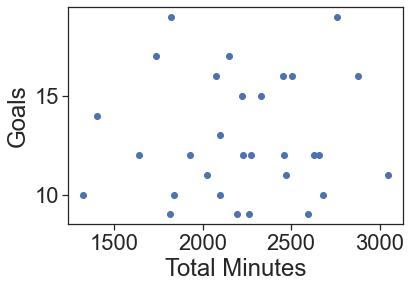

In [67]:
#Correlation minutes played/goals
print(players_2021['Minutes Played'].corr(players_2021['Goals']))

#Plot minutes/goals
plt.scatter('Minutes Played', 'Goals', data = players_2021)
plt.xlabel('Total Minutes')
plt.ylabel('Goals')

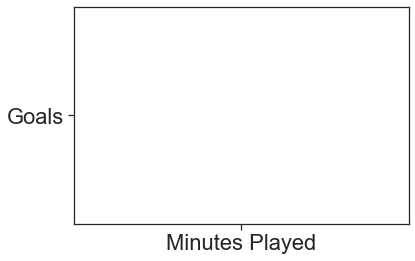

In [103]:
plt.bar('Minutes Played', 'Goals') 
plt.show()

#correlation passes and assits

0.65098433857441


Text(0, 0.5, 'Assist')

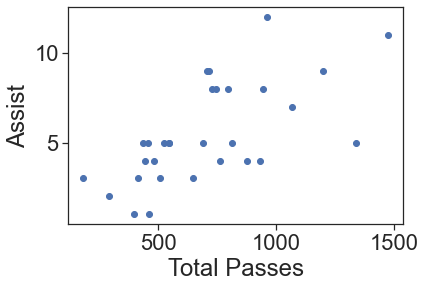

In [69]:
#Correlation passes/assists
print(players_2021['Passes'].corr(players_2021['Assist']))

#Plot passes/assist
plt.scatter('Passes', 'Assist', data = players_2021)
plt.xlabel('Total Passes')
plt.ylabel('Assist')

#group by country and count of country

In [70]:
players_2021.groupby(['Nationality'])['Player'].count().sort_values(ascending=False)

Nationality
USA          5
Argentina    4
Colombia     4
Germany      2
Mexico       2
Peru         1
Slovakia     1
Scotland     1
Portugal     1
Poland       1
Norway       1
Paraguay     1
Armenia      1
Hungary      1
Finland      1
Croatia      1
Chile        1
Venezuela    1
Name: Player, dtype: int64

#average goals, minutes, passes, assists of top30 players

In [71]:
#average goals top 30 players
avg_goals = players_2021['Goals'].mean()
print('Average goals in 2021 of Top 30 players:', avg_goals)

#average minutes
avg_min = players_2021['Minutes Played'].mean()
print('Average played by top 30 players in 2021:', avg_min)

#average passes
avg_pass = players_2021['Passes'].mean()
print('Average passes taken by Top 30 players in 2021:', avg_pass)

#average assists
avg_assists = players_2021['Assist'].mean()
print('Average assist in 2021 by Top 30 players:', avg_assists)

Average goals in 2021 of Top 30 players: 12.866666666666667
Average played by top 30 players in 2021: 2218.5666666666666
Average passes taken by Top 30 players in 2021: 702.7333333333333
Average assist in 2021 by Top 30 players: 5.5


# Pull in Excel files

In [72]:
matches_df = pd.read_csv("../Data/matches.csv")
events_df = pd.read_csv("../Data/events.csv")
tables_df = pd.read_csv("../Data/all_tables.csv")
players_df = pd.read_csv("../Data/all_players.csv")
goalies_df = pd.read_csv("../Data/all_goalkeepers.csv")

C:\Users\andyr\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (11,14,50,102,123,125,129,131,133,135,137,139,141,143,145,147,149,157,158,160,161,163,165,167,169,171,173,184,186,187,205,206) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


#Attendance stats

In [73]:
matches_df['attendance'] = matches_df['attendance'].str.replace(',', '')
matches_df

,id,home,away,date,year,time (utc),attendance,venue,league,part_of_competition,...,away_offsides,home_wonCorners,away_wonCorners,home_saves,away_saves,away_bench_14_num,away_bench_14,away_bench_14_minute,home_formation,away_formation
0,NaN,New England,San Jose,7/31/1996,1996,NaN,12871,Foxboro Stadium,1996 MLS,Regular Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Dallas,Colorado,6/15/1996,1996,NaN,9704,Cotton Bowl,1996 MLS,Regular Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Colorado,D.C. United,8/29/1996,1996,NaN,6368,Mile High Stadium,1996 MLS,Regular Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,LA Galaxy,New England,8/8/1996,1996,NaN,10251,Rose Bowl,1996 MLS,Regular Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,New England,D.C. United,7/20/1996,1996,NaN,18347,Foxboro Stadium,1996 MLS,Regular Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6990,598143.0,LA Galaxy,Minnesota United FC,"Sunday, November 7",2021,23:00,23803,"Dignity Health Sports Park, Carson",2021 Major League Soccer,Regular Season,...,1.0,5.0,7.0,1.0,7.0,NaN,NaN,NaN,4-4-2,4-2-3-1
6991,598142.0,Portland Timbers,Austin FC,"Sunday, November 7",2021,23:00,23127,"Providence Park, Portland, OR",2021 Major League Soccer,Regular Season,...,2.0,5.0,6.0,4.0,6.0,NaN,NaN,NaN,4-2-3-1,4-2-3-1
6992,598141.0,San Jose Earthquakes,FC Dallas,"Sunday, November 7",2021,23:00,NaN,"PayPal Park, San Jose",2021 Major League Soccer,Regular Season,...,2.0,10.0,0.0,0.0,6.0,NaN,NaN,NaN,4-2-3-1,4-2-3-1
6993,598145.0,Sporting Kansas City,Real Salt Lake,"Sunday, November 7",2021,23:00,19022,"Children's Mercy Park, Kansas City, KS",2021 Major League Soccer,Regular Season,...,1.0,1.0,0.0,2.0,4.0,NaN,NaN,NaN,4-3-3,4-4-2


In [74]:
matches_df['attendance'] = matches_df['attendance'].fillna(0)

In [75]:
matches_df[['year','attendance']] = matches_df[['year','attendance']].astype(float).astype('Int32')

In [76]:
matches = matches_df.groupby(['year'])['attendance'].mean().reset_index()
matches

,year,attendance
0,1996,17431.841808
1,1997,14711.450867
2,1998,14552.742718
3,1999,14420.793269
4,2000,972.62201
5,2001,0.0
6,2002,0.0
7,2003,0.0
8,2004,0.0
9,2005,0.0


In [77]:
matches1 = matches.rename(columns={"attendance":"attendance1"})

In [78]:
matches2 = matches1.groupby(['year'])['attendance1'].mean().reset_index()
matches2

,year,attendance1
0,1996,17431.841808
1,1997,14711.450867
2,1998,14552.742718
3,1999,14420.793269
4,2000,972.62201
5,2001,0.0
6,2002,0.0
7,2003,0.0
8,2004,0.0
9,2005,0.0


In [79]:
type(matches)

pandas.core.frame.DataFrame

In [80]:
matches['attendance'] = matches['attendance'].astype(int)

In [81]:
matches1['attendance1'] = matches1['attendance1'].astype(int)

In [82]:
attendance = pd.DataFrame(matches, index = [17, 21, 25])
attendance

,year,attendance
17,2013,18730
21,2017,22311
25,2021,13619


In [83]:
attendance1 = pd.DataFrame(matches, index = [1, 12, 17, 21])
attendance1

,year,attendance
1,1997,14711
12,2008,16163
17,2013,18730
21,2017,22311


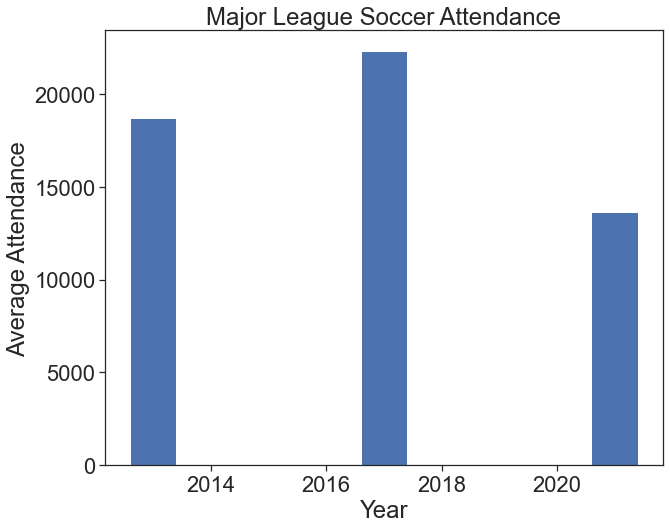

In [124]:
plt.figure(figsize=(10,8))

x = attendance['year']
y = attendance['attendance']
plt.xlabel('Year')
plt.ylabel('Average Attendance')
plt.title("Major League Soccer Attendance")
plt.bar(x, y)
x_ticks = [2013, 2017, 2021]
x_labels = [2013, 2017, 2021] 
       
plt.show()

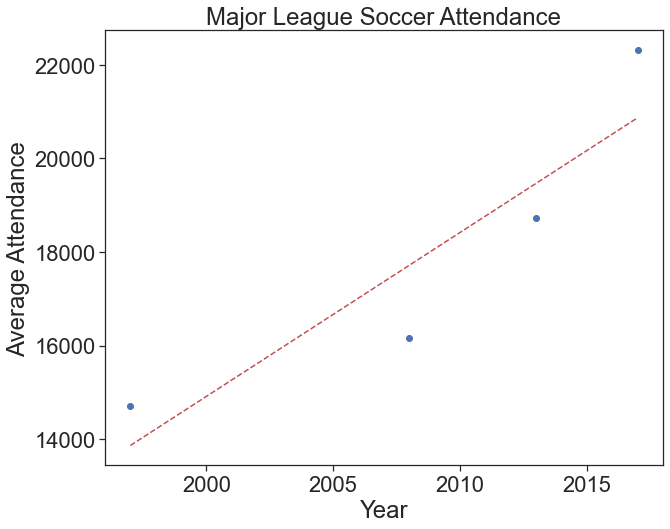

In [85]:
plt.figure(figsize=(10,8))

x = attendance1['year']
y = attendance1['attendance']
plt.xlabel('Year')
plt.ylabel('Average Attendance')
plt.title("Major League Soccer Attendance")
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

#Get events table -- grouper 15 minute for goals scored in 15 minute windows in 2000, 2010, 2020 / Total goals per season 2000, 2010, 2020 / average goals per game 2000, 2010, 2020 / minutes per goal 2000, 2010, 2020

In [86]:
events_df

,id,Time,Event
0,14876,-,no commentary
1,14877,-,no commentary
2,14879,-,no commentary
3,14878,-,no commentary
4,14880,-,no commentary
...,...,...,...
473325,598144,90'+3',Foul by Lucas Cavallini (Vancouver Whitecaps FC).
473326,598144,90'+3',Nicolas Benezet (Seattle Sounders FC) wins a f...
473327,598144,90'+4',Attempt saved. Fredy Montero (Seattle Sounders...
473328,598144,90'+6',"Second Half ends, Vancouver Whitecaps FC 1, Se..."


In [87]:
type(events_df)

pandas.core.frame.DataFrame

In [88]:
events_df.dtypes

id        int64
Time     object
Event    object
dtype: object

In [89]:
events_df['Time'] = events_df['Time'].str.replace("'", '')
events_df

,id,Time,Event
0,14876,-,no commentary
1,14877,-,no commentary
2,14879,-,no commentary
3,14878,-,no commentary
4,14880,-,no commentary
...,...,...,...
473325,598144,90+3,Foul by Lucas Cavallini (Vancouver Whitecaps FC).
473326,598144,90+3,Nicolas Benezet (Seattle Sounders FC) wins a f...
473327,598144,90+4,Attempt saved. Fredy Montero (Seattle Sounders...
473328,598144,90+6,"Second Half ends, Vancouver Whitecaps FC 1, Se..."


In [90]:
events_df['Time'] = events_df['Time'].str.replace('+', '')
events_df

<ipython-input-90-2b6dee6caf31>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  events_df['Time'] = events_df['Time'].str.replace('+', '')


,id,Time,Event
0,14876,-,no commentary
1,14877,-,no commentary
2,14879,-,no commentary
3,14878,-,no commentary
4,14880,-,no commentary
...,...,...,...
473325,598144,903,Foul by Lucas Cavallini (Vancouver Whitecaps FC).
473326,598144,903,Nicolas Benezet (Seattle Sounders FC) wins a f...
473327,598144,904,Attempt saved. Fredy Montero (Seattle Sounders...
473328,598144,906,"Second Half ends, Vancouver Whitecaps FC 1, Se..."


In [91]:
events_df['Time'] = events_df['Time'].str[:2]
events_df

,id,Time,Event
0,14876,-,no commentary
1,14877,-,no commentary
2,14879,-,no commentary
3,14878,-,no commentary
4,14880,-,no commentary
...,...,...,...
473325,598144,90,Foul by Lucas Cavallini (Vancouver Whitecaps FC).
473326,598144,90,Nicolas Benezet (Seattle Sounders FC) wins a f...
473327,598144,90,Attempt saved. Fredy Montero (Seattle Sounders...
473328,598144,90,"Second Half ends, Vancouver Whitecaps FC 1, Se..."


In [92]:
events_df['Time'] = events_df['Time'].str.replace('-', '')
events_df

,id,Time,Event
0,14876,,no commentary
1,14877,,no commentary
2,14879,,no commentary
3,14878,,no commentary
4,14880,,no commentary
...,...,...,...
473325,598144,90,Foul by Lucas Cavallini (Vancouver Whitecaps FC).
473326,598144,90,Nicolas Benezet (Seattle Sounders FC) wins a f...
473327,598144,90,Attempt saved. Fredy Montero (Seattle Sounders...
473328,598144,90,"Second Half ends, Vancouver Whitecaps FC 1, Se..."


In [93]:
events_df.dtypes

id        int64
Time     object
Event    object
dtype: object

In [94]:
events_df['Time'] = pd.to_numeric(events_df['Time'])
events_df

,id,Time,Event
0,14876,NaN,no commentary
1,14877,NaN,no commentary
2,14879,NaN,no commentary
3,14878,NaN,no commentary
4,14880,NaN,no commentary
...,...,...,...
473325,598144,90.0,Foul by Lucas Cavallini (Vancouver Whitecaps FC).
473326,598144,90.0,Nicolas Benezet (Seattle Sounders FC) wins a f...
473327,598144,90.0,Attempt saved. Fredy Montero (Seattle Sounders...
473328,598144,90.0,"Second Half ends, Vancouver Whitecaps FC 1, Se..."


In [95]:
events_df.dropna(subset=['Time'])

,id,Time,Event
1264,237750,1.0,Throw-in: Stefani Miglioranzi takes it (Defend...
1265,237750,1.0,Throw-in: Stefani Miglioranzi takes it (Attack...
1266,237750,1.0,Throw-in: Stefani Miglioranzi takes it (Attack...
1267,237750,2.0,Guillermo Barros Schelotto commits a foul on J...
1268,237750,3.0,Throw-in: Frankie Hejduk takes it (Attacking)
...,...,...,...
473324,598144,90.0,"Corner, Seattle Sounders FC. Conceded by Russ..."
473325,598144,90.0,Foul by Lucas Cavallini (Vancouver Whitecaps FC).
473326,598144,90.0,Nicolas Benezet (Seattle Sounders FC) wins a f...
473327,598144,90.0,Attempt saved. Fredy Montero (Seattle Sounders...


In [96]:
events_df.dtypes

id         int64
Time     float64
Event     object
dtype: object

In [97]:
events_df[['Time']] = events_df[['Time']].astype(float).astype('Int64')

In [98]:
single_game_events = events_df[events_df['Event'].str.contains('Goal!')]
single_game_events

,id,Time,Event
1311,237750,26,Goal!! Adam Moffat hits a very good right foot...
1417,237750,76,Goal!! Alejandro Moreno hits a very good right...
1561,237751,90,Goal!! Cuauhtemoc Blanco hits a very good left...
1631,237753,49,Goal!! Ivan Trujillo hits a very good right fo...
1644,237753,61,Goal!! Claudio Lopez hits a very good left foo...
...,...,...,...
473062,598141,34,"Goal! San Jose Earthquakes 1, FC Dallas 0. Ch..."
473073,598141,42,"Goal! San Jose Earthquakes 1, FC Dallas 1. Já..."
473242,598145,90,"Goal! Sporting Kansas City 0, Real Salt Lake ..."
473254,598144,8,"Goal! Vancouver Whitecaps FC 0, Seattle Sound..."


In [99]:
#single_game_events.groupby(['id']).mean()

In [100]:
for t in single_game_events['Time']:
    if t > 0 and t <= 15:
        print('0-15')
    elif t > 15 and t <= 30:
        print('16-30')
    elif t > 30 and t <= 45:
        print('31-45')
    elif t > 45 and t <= 60:
        print('46-60')
    elif t > 60 and t <= 75:
        print('61-75')
    elif t > 75 and t <= 90:
        print('75-90')

16-30
75-90
75-90
46-60
61-75
0-15
31-45
75-90
0-15
61-75
75-90
16-30
75-90
0-15
16-30
31-45
0-15
31-45
46-60
46-60
46-60
61-75
75-90
0-15
0-15
46-60
75-90
75-90
0-15
0-15
31-45
46-60
46-60
75-90
16-30
31-45
31-45
46-60
46-60
75-90
31-45
31-45
16-30
31-45
31-45
61-75
61-75
75-90
75-90
61-75
0-15
61-75
0-15
16-30
75-90
75-90
31-45
31-45
46-60
75-90
31-45
31-45
31-45
16-30
46-60
31-45
46-60
31-45
61-75
75-90
75-90
0-15
0-15
75-90
61-75
46-60
75-90
16-30
61-75
75-90
75-90
46-60
75-90
75-90
16-30
31-45
46-60
61-75
75-90
75-90
75-90
75-90
16-30
31-45
0-15
31-45
16-30
46-60
75-90
0-15
16-30
31-45
31-45
46-60
61-75
31-45
61-75
31-45
61-75
75-90
16-30
46-60
61-75
31-45
61-75
75-90
75-90
75-90
16-30
75-90
75-90
16-30
46-60
75-90
61-75
0-15
16-30
75-90
16-30
16-30
75-90
16-30
61-75
75-90
75-90
16-30
31-45
31-45
46-60
75-90
0-15
61-75
75-90
75-90
75-90
0-15
31-45
31-45
61-75
61-75
75-90
75-90
31-45
75-90
75-90
31-45
61-75
75-90
0-15
46-60
46-60
61-75
61-75
31-45
46-60
61-75
75-90
0-15
46-60
46-60

61-75
16-30
16-30
46-60
61-75
0-15
46-60
46-60
61-75
0-15
31-45
61-75
75-90
75-90
46-60
61-75
75-90
0-15
31-45
61-75
31-45
75-90
75-90
0-15
16-30
46-60
0-15
61-75
61-75
0-15
16-30
0-15
31-45
46-60
75-90
75-90
0-15
75-90
0-15
0-15
0-15
31-45
46-60
61-75
61-75
75-90
31-45
61-75
0-15
0-15
75-90
75-90
75-90
75-90
75-90
75-90
16-30
31-45
31-45
31-45
61-75
75-90
75-90
46-60
31-45
16-30
16-30
16-30
31-45
61-75
75-90
75-90
16-30
31-45
75-90
0-15
16-30
75-90
0-15
31-45
46-60
61-75
75-90
31-45
61-75
75-90
31-45
46-60
0-15
0-15
16-30
75-90
31-45
46-60
61-75
16-30
31-45
46-60
46-60
46-60
75-90
75-90
16-30
31-45
61-75
75-90
0-15
16-30
61-75
75-90
75-90
0-15
16-30
75-90
31-45
46-60
46-60
61-75
61-75
61-75
75-90
75-90
0-15
0-15
31-45
61-75
75-90
0-15
31-45
46-60
75-90
0-15
31-45
61-75
75-90
75-90
0-15
16-30
31-45
46-60
46-60
61-75
61-75
61-75
75-90
75-90
61-75
61-75
61-75
75-90
31-45
31-45
61-75
61-75
0-15
16-30
31-45
46-60
75-90
75-90
0-15
75-90
0-15
46-60
61-75
75-90
0-15
46-60
61-75
0-15
75-90
31-

16-30
46-60
46-60
61-75
75-90
75-90
0-15
0-15
31-45
46-60
61-75
61-75
61-75
61-75
16-30
75-90
75-90
16-30
31-45
46-60
75-90
61-75
46-60
75-90
46-60
31-45
61-75
46-60
61-75
61-75
0-15
16-30
31-45
0-15
16-30
31-45
61-75
75-90
0-15
16-30
31-45
31-45
46-60
46-60
61-75
75-90
31-45
31-45
61-75
75-90
0-15
75-90
16-30
31-45
31-45
46-60
75-90
16-30
16-30
31-45
61-75
75-90
75-90
16-30
31-45
61-75
75-90
75-90
75-90
0-15
16-30
46-60
61-75
0-15
16-30
31-45
75-90
0-15
31-45
31-45
46-60
61-75
61-75
75-90
75-90
31-45
61-75
61-75
75-90
31-45
61-75
16-30
16-30
46-60
16-30
16-30
61-75
61-75
16-30
31-45
31-45
46-60
75-90
61-75
75-90
0-15
31-45
46-60
31-45
61-75
75-90
46-60
46-60
16-30
16-30
61-75
61-75
16-30
46-60
61-75
75-90
16-30
46-60
61-75
75-90
75-90
0-15
31-45
46-60
46-60
75-90
16-30
31-45
75-90
31-45
46-60
61-75
75-90
0-15
46-60
75-90
31-45
61-75
0-15
46-60
31-45
31-45
46-60
16-30
46-60
75-90
0-15
61-75
75-90
0-15
16-30
16-30
31-45
46-60
75-90
61-75
61-75
16-30
75-90
0-15
31-45
46-60
31-45
46-60
61

In [101]:
#concat new df as frequency

In [102]:
single_game_events.groupby(by=['id', 'new_df']).sum()

KeyError: 'new_df'